#1. Import Pycaret

In [1]:
# run this cell to install pycaret in Google Colab
!pip install pycaret

In [2]:
from pycaret.utils import version
version()

'3.3.2'

#2. Import Library

In [3]:
import pandas as pd
from pycaret.classification import *

#3. Import Dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#path_bugzilla = '/content/drive/MyDrive/S2/Semester III/Software Quality & Effort Estimation/Tugas/Tugas III/With in Defect Prediction/Kamei/bugzilla.csv'
#path_columba = '/content/drive/MyDrive/S2/Semester III/Software Quality & Effort Estimation/Tugas/Tugas III/With in Defect Prediction/Kamei/columba.csv'
#path_jdt = '/content/drive/MyDrive/S2/Semester III/Software Quality & Effort Estimation/Tugas/Tugas III/With in Defect Prediction/Kamei/jdt.csv'
#path_mozilla = '/content/drive/MyDrive/S2/Semester III/Software Quality & Effort Estimation/Tugas/Tugas III/With in Defect Prediction/Kamei/mozilla.csv'
path_platform = '/content/drive/MyDrive/S2/Semester III/Software Quality & Effort Estimation/Tugas/Tugas III/With in Defect Prediction/Kamei/platform.csv'
#path_postgres = '/content/drive/MyDrive/S2/Semester III/Software Quality & Effort Estimation/Tugas/Tugas III/With in Defect Prediction/Kamei/postgres.csv'

#df = pd.read_csv(path_bugzilla)
#df = pd.read_csv(path_columba)
#df = pd.read_csv(path_jdt)
#df = pd.read_csv(path_mozilla)
df = pd.read_csv(path_platform)
#df = pd.read_csv(path_postgres)

#4. Preprocessing

In [7]:
df.head()

,transactionid,commitdate,ns,nm,nf,entropy,la,ld,lt,fix,ndev,pd,npt,exp,rexp,sexp,bug
0,88,2003/3/10 16:31,1,3,17,0.994911,0.159684,0.096443,74.411765,1,9,1377,0.823529,715,715.000000,17,0
1,119,2003/10/15 11:45,1,4,4,0.874002,0.090802,0.071934,212.000000,1,1,117,1.000000,4931,2809.466667,1076,1
2,558,2005/5/4 16:43,1,1,1,0.000000,0.008929,0.089286,336.000000,1,2,2,1.000000,9612,4256.970238,3790,0
3,671,2003/3/4 13:37,3,15,80,0.816872,0.877167,0.877167,85.787500,0,3,6526,0.475000,1836,1152.000000,1179,1
4,674,2005/1/27 22:50,1,1,6,0.777333,0.064397,0.156394,181.166667,0,2,2885,0.833333,4082,1326.607143,85,0


In [8]:
# Menghapus kolom yang tidak dibutuhkan
df_stats = df.drop(columns=['transactionid', 'commitdate'])

# Menghitung statistik deskriptif
df_stats.describe()




,ns,nm,nf,entropy,la,ld,lt,fix,ndev,pd,npt,exp,rexp,sexp,bug
count,64250.000000,64250.000000,64250.000000,64250.000000,64250.000000,64250.000000,64250.000000,64250.000000,64250.000000,64250.000000,64250.000000,64250.000000,64250.000000,64250.000000,64250.000000
mean,1.057619,1.575440,3.763237,0.273840,0.147437,2.016220,354.697510,0.399455,5.009992,216.829121,0.880221,3765.374895,1654.000888,1854.110973,0.147113
std,0.302847,2.131467,20.839675,0.388311,0.602069,64.635401,556.867127,0.489790,4.403502,2878.246806,0.234487,4139.687302,1477.505440,2083.456111,0.354221
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.001645,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,0.003390,0.000822,62.000000,0.000000,2.000000,0.000000,1.000000,820.000000,624.808333,301.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,0.022472,0.010372,169.000000,0.000000,4.000000,9.000000,1.000000,2396.000000,1206.000000,1081.000000,0.000000
75%,1.000000,2.000000,2.000000,0.678385,0.091357,0.046668,410.000000,1.000000,7.000000,68.000000,1.000000,5210.000000,2284.517559,2727.000000,0.000000
max,18.000000,146.000000,1569.000000,1.000000,73.000000,10166.000000,8744.000000,1.000000,37.000000,243217.000000,1.000000,22611.000000,8158.736508,22123.000000,1.000000


In [9]:
df['ns'].unique()

array([ 1,  3,  2,  4,  5,  8, 17,  6,  7, 18, 11, 10])

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


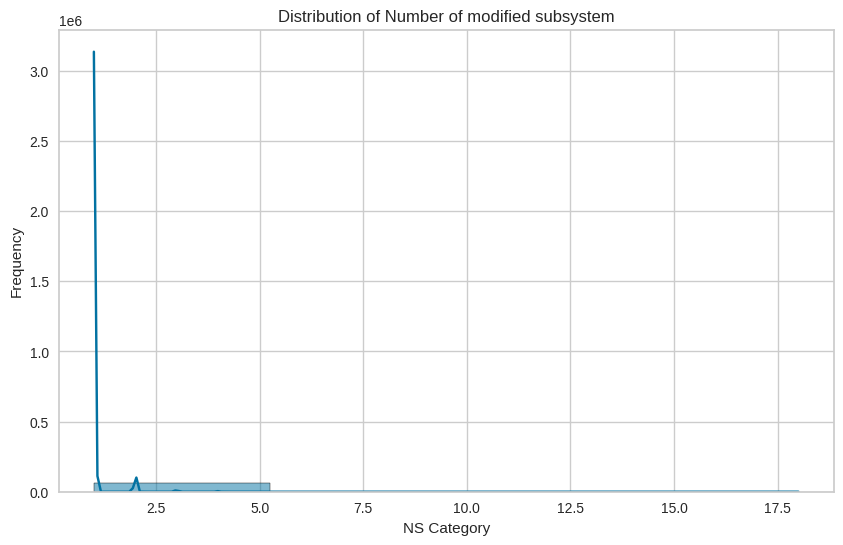

In [11]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['ns'], kde=True, color="b", bins=4)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Number of modified subsystem')
plt.xlabel('NS Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

In [12]:
df['nm'].unique()

array([  3,   4,   1,  15,  10,   2,   5,   6,  11,  13,  16,  17,   8,
        24,  28,  20,  12,  19,   7,  26,   9,  14,  34,  32, 146,  22,
        23,  50,  81,  29,  18,  21,  27,  30,  40,  31, 127,  64, 124,
        33,  68,  71,  36,  67,  60,  92,  38,  39,  41,  25,  85,  66,
        46,  45,  42,  51])

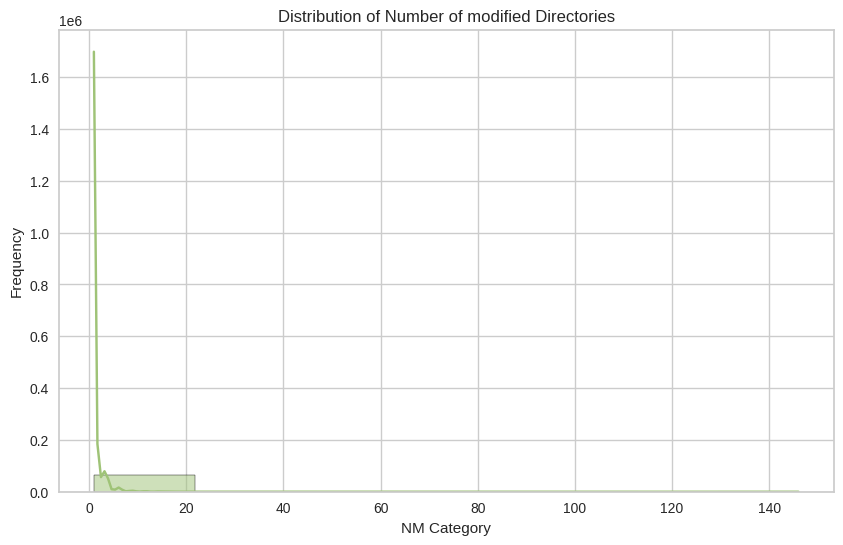

In [13]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['nm'], kde=True, color="g", bins=7)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Number of modified Directories')
plt.xlabel('NM Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

In [14]:
df['nf'].unique()

array([  17,    4,    1,   80,    6,    8,    9,   99,    3,    2,   10,
         19,   15,    5,   11,    7,   31,   20,   41,   23,   36,   29,
         57,   26,   12,   14,  133,  234,   51,   84,  101,   39,   13,
        155,   32,  110,   28,  176,   22,   82,   24,   18,   27,   16,
         25,  106,   89,  208,  202,   30,  214,  232,   74,   56,  212,
         58,  150,   34,   62,   45,   66,   48,   44,   72,   50,   33,
         40,   21,   35,   42,   46,  931,   54,   37,  179,   59,  109,
        159,   61,   88,  263,   95,   49,   55,   83,  100,  163,   47,
         76,  338,  160,  209,   70,   52,   86,   92,  741,  178,  126,
        116,  148,   69,  149,  135,   81,  107,  175,  226,   75,  188,
        108,  183,  158,   64,   63,  448,   43,  144,   85,   38,  128,
         67,   65,  238,  191, 1569,   73,   68,   53,   77,  125,  248,
        259,  311,  129,  111, 1556,  121,   78,  104,  103,   94,  216,
        152,  165,  221,   60,  134,  535,  424,   

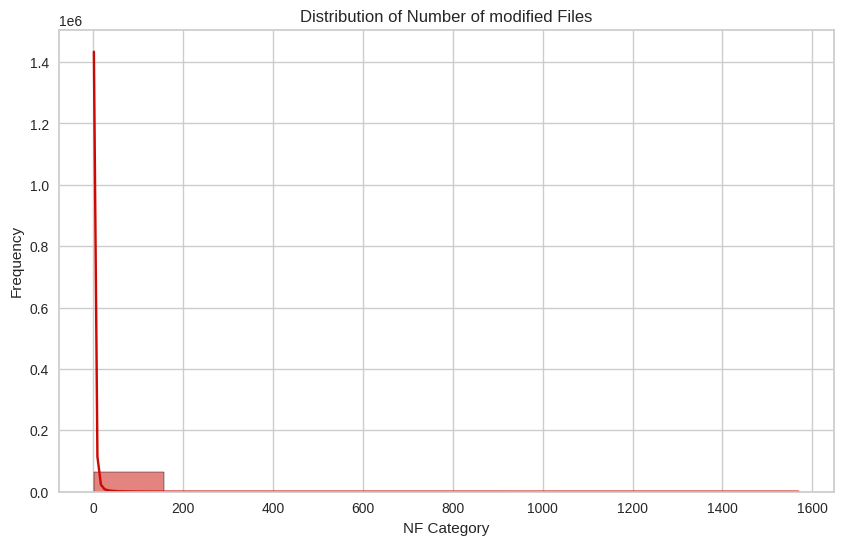

In [15]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['nf'], kde=True, color="r", bins=10)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Number of modified Files')
plt.xlabel('NF Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

In [16]:
df['entropy'].unique()

array([0.99491058, 0.87400194, 0.        , ..., 0.78201038, 0.7687636 ,
       0.98759208])

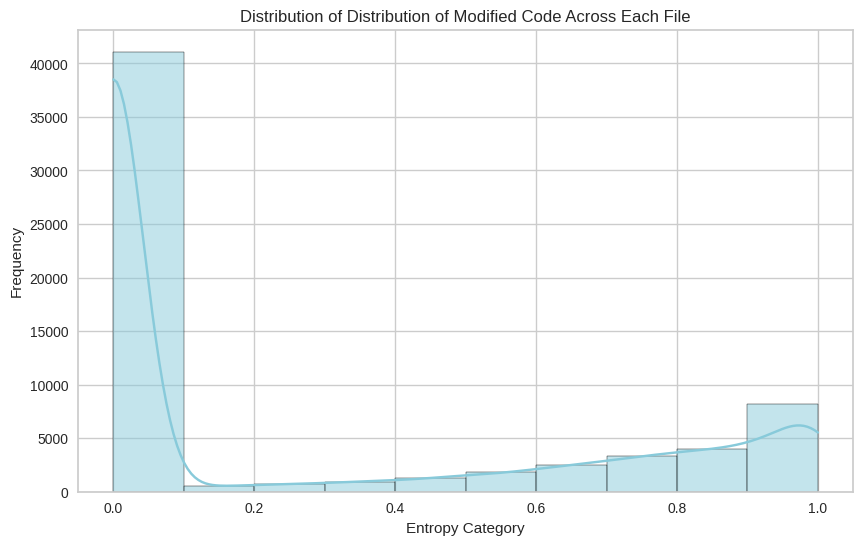

In [17]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['entropy'], kde=True, color="c", bins=10)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Distribution of Modified Code Across Each File')
plt.xlabel('Entropy Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

In [18]:
df['la'].unique()

array([0.15968379, 0.09080189, 0.00892857, ..., 1.09266943, 0.05342552,
       2.36111111])

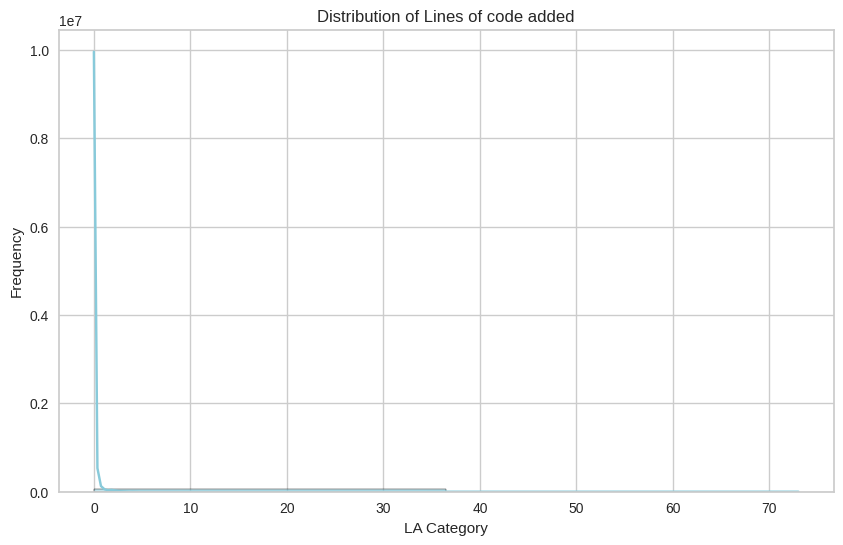

In [19]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['la'], kde=True, color="c", bins=2)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Lines of code added')
plt.xlabel('LA Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

In [20]:
df['ld'].unique()

array([0.09644269, 0.07193396, 0.08928571, ..., 1.11659751, 0.07919548,
       1.38888889])

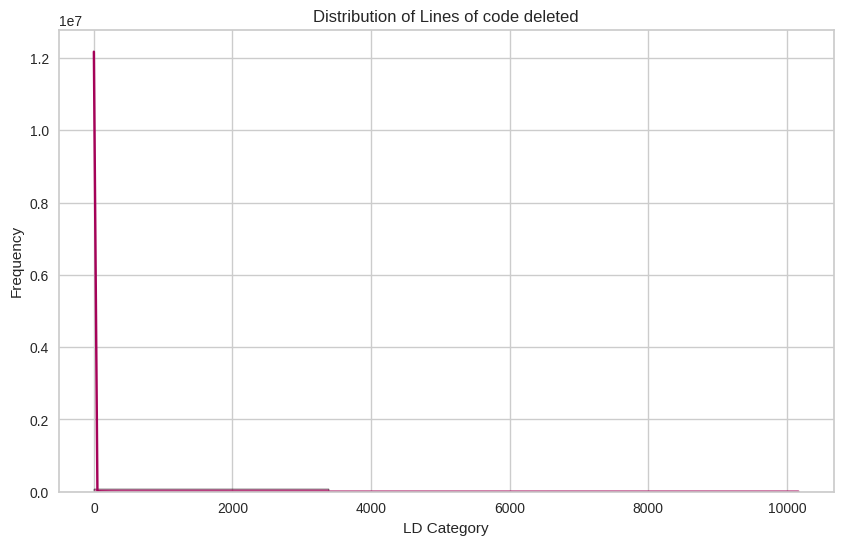

In [21]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['ld'], kde=True, color="m", bins=3)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Lines of code deleted')
plt.xlabel('LD Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

In [22]:
df['lt'].unique()

array([ 74.41176471, 212.        , 336.        , ...,  77.35      ,
        59.26229508,  36.15909091])

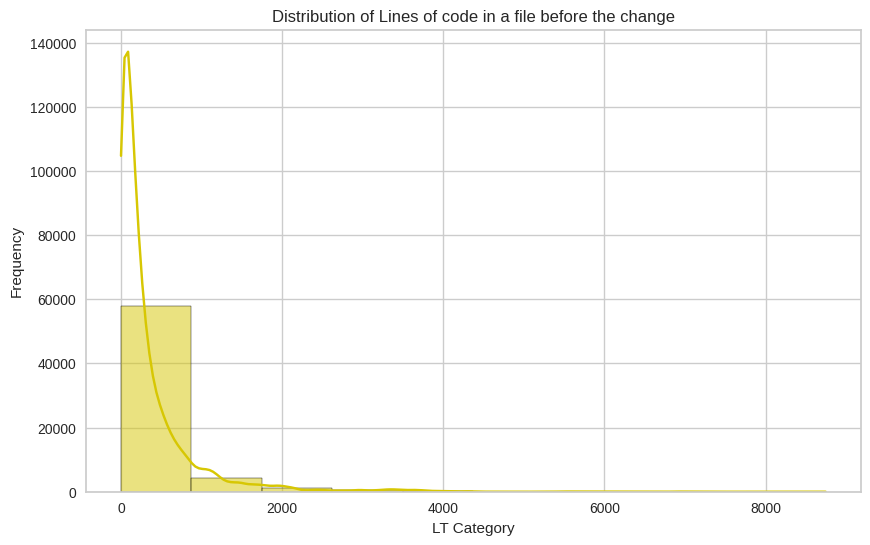

In [23]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['lt'], kde=True, color="y", bins=10)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Lines of code in a file before the change')
plt.xlabel('LT Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

In [24]:
df['fix'].unique()

array([1, 0])

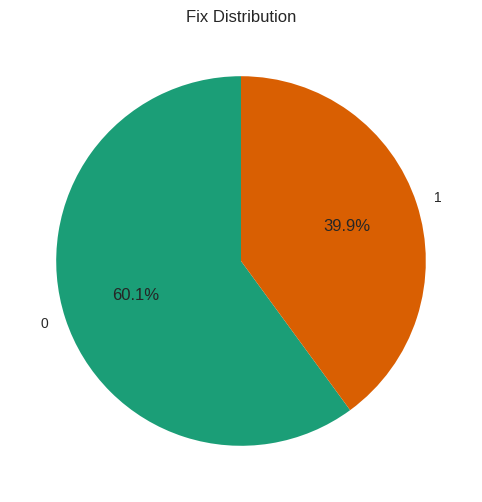

In [25]:
a=df['fix'].value_counts()

# Membuat pie diagram
plt.figure(figsize=(8, 6))
plt.pie(a, labels=a.index, autopct='%1.1f%%', colors=sns.color_palette('Dark2'), startangle=90)

# Menambahkan judul
plt.title('Fix Distribution')

# Menampilkan plot
plt.show()

In [26]:
df['ndev'].unique()

array([ 9,  1,  2,  3,  4,  6,  5, 11, 10,  7,  8, 21, 20, 19, 15, 35, 12,
       14, 13, 28, 16, 37, 18, 17, 27, 23, 26, 22, 24, 25, 32, 30, 29])

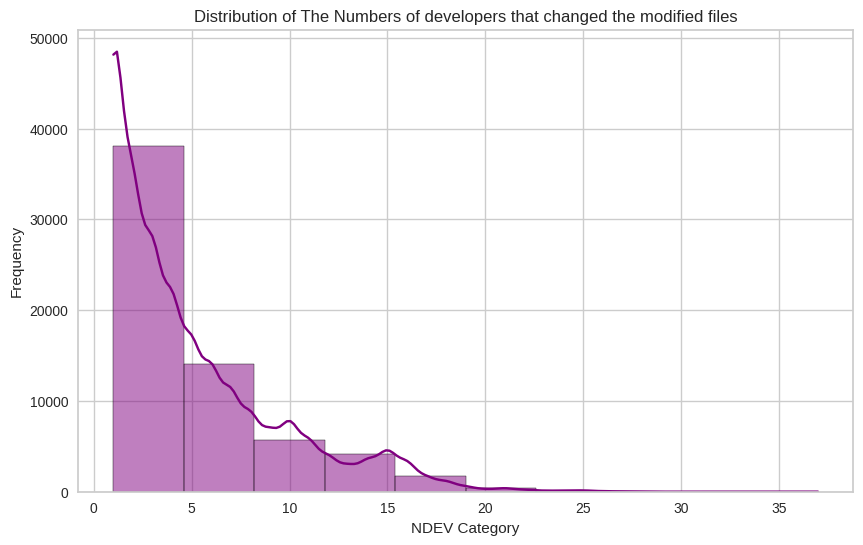

In [27]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['ndev'], kde=True, color="purple", bins=10)

# Menambahkan judul dan label sumbu
plt.title('Distribution of The Numbers of developers that changed the modified files')
plt.xlabel('NDEV Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

In [28]:
df['pd'].unique()

array([ 1377,   117,     2, ...,  8835, 16642, 48152])

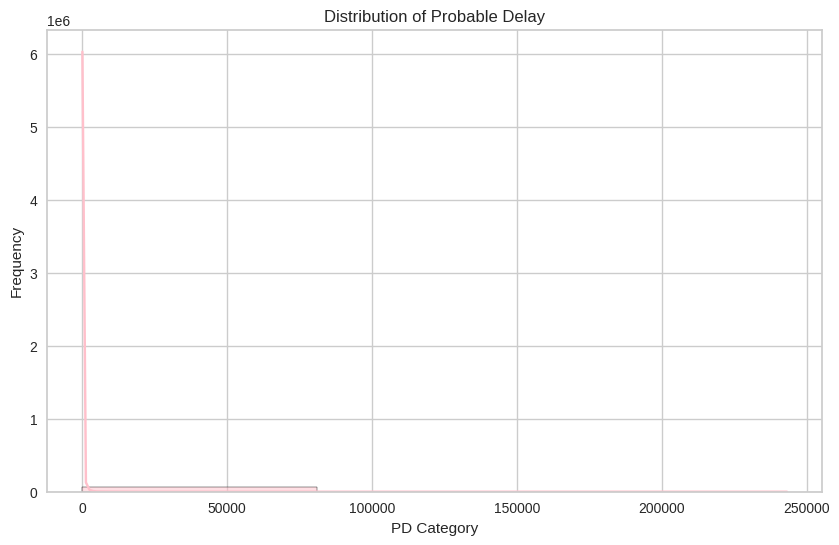

In [29]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['pd'], kde=True, color="pink", bins=3)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Probable Delay')
plt.xlabel('PD Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

In [30]:
df['npt'].unique()

array([0.82352941, 1.        , 0.475     , 0.83333333, 0.875     ,
       0.44444444, 0.11111111, 0.01010101, 0.66666667, 0.75      ,
       0.33333333, 0.5       , 0.16666667, 0.1       , 0.375     ,
       0.10526316, 0.86666667, 0.8       , 0.36363636, 0.85714286,
       0.28571429, 0.4       , 0.6       , 0.38709677, 0.2       ,
       0.17073171, 0.25      , 0.22222222, 0.125     , 0.09090909,
       0.73913043, 0.55555556, 0.11764706, 0.57142857, 0.54545455,
       0.24137931, 0.01754386, 0.84615385, 0.71428571, 0.0075188 ,
       0.56837607, 0.54901961, 0.69047619, 0.7       , 0.625     ,
       0.14285714, 0.26732673, 0.69230769, 0.15789474, 0.15384615,
       0.00645161, 0.3125    , 0.42857143, 0.00909091, 0.07692308,
       0.41176471, 0.81818182, 0.05263158, 0.39204545, 0.72727273,
       0.59090909, 0.40243902, 0.70833333, 0.31578947, 0.68421053,
       0.25925926, 0.18181818, 0.3       , 0.38888889, 0.0625    ,
       0.32142857, 0.42105263, 0.05555556, 0.20754717, 0.55   

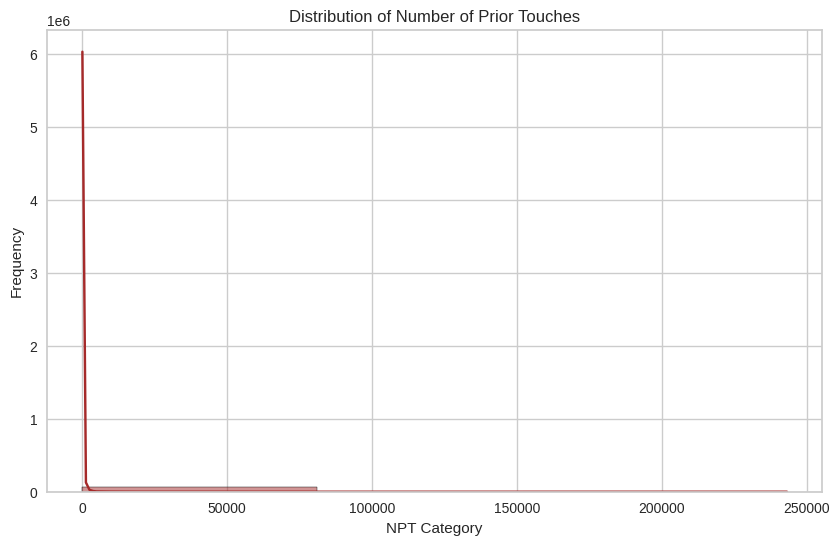

In [31]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['pd'], kde=True, color="brown", bins=3)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Number of Prior Touches')
plt.xlabel('NPT Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

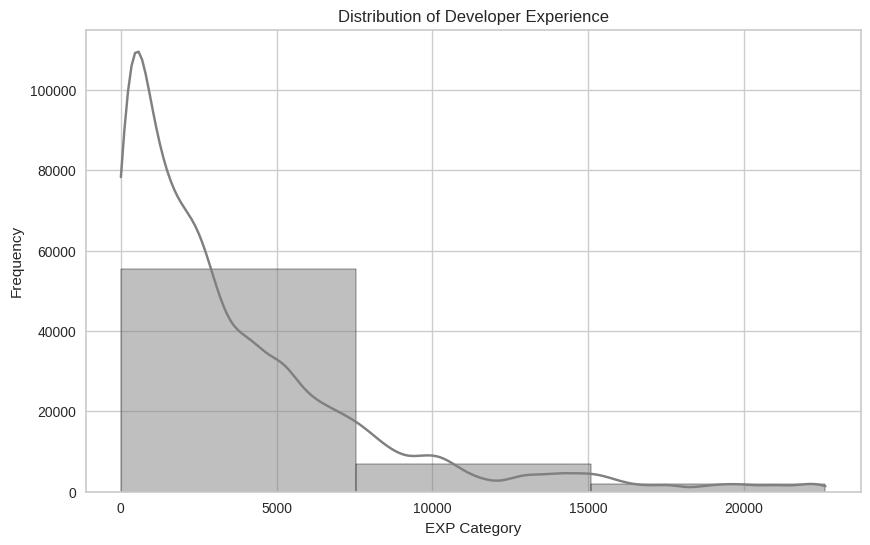

In [32]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['exp'], kde=True, color="gray", bins=3)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Developer Experience')
plt.xlabel('EXP Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

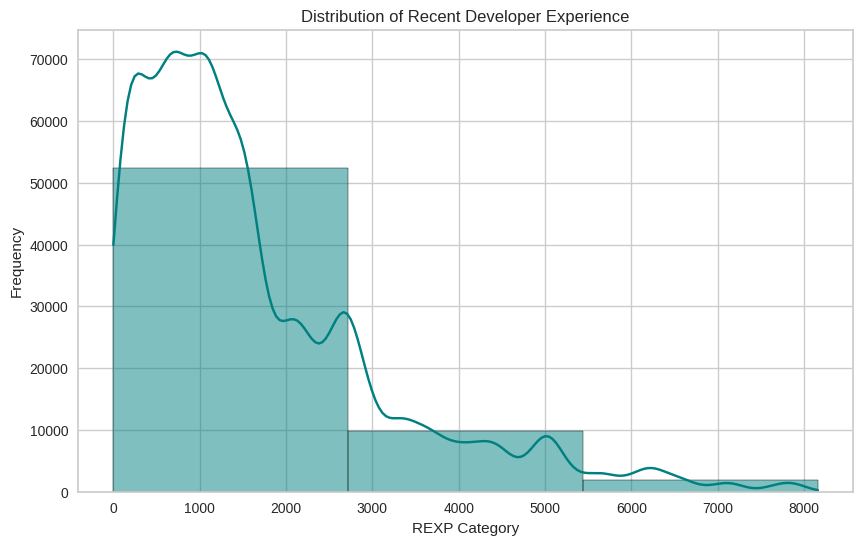

In [33]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['rexp'], kde=True, color="teal", bins=3)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Recent Developer Experience')
plt.xlabel('REXP Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

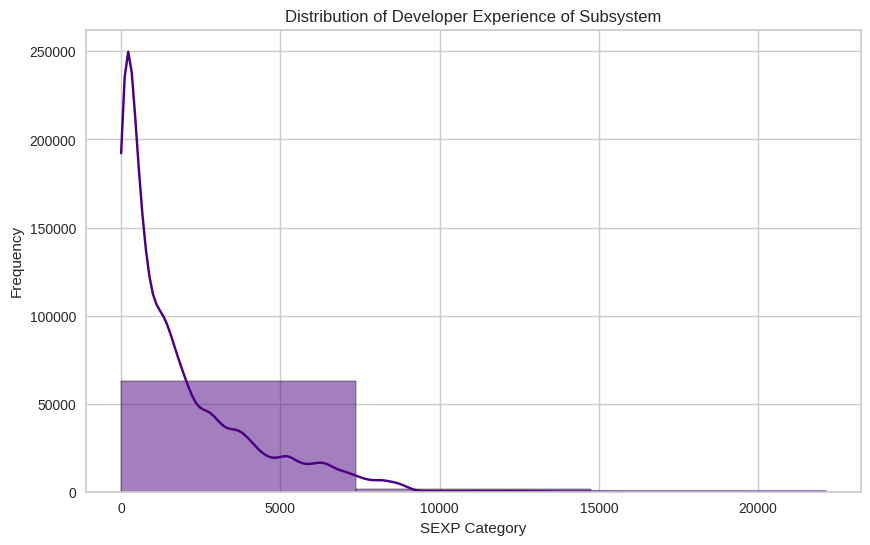

In [34]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['sexp'], kde=True, color="indigo", bins=3)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Developer Experience of Subsystem')
plt.xlabel('SEXP Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

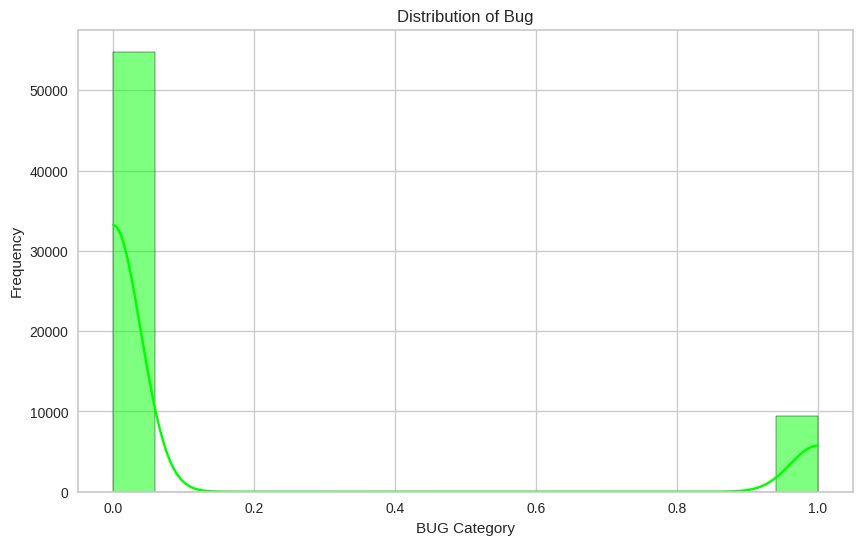

In [35]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['bug'], kde=True, color="lime")

# Menambahkan judul dan label sumbu
plt.title('Distribution of Bug')
plt.xlabel('BUG Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64250 entries, 0 to 64249
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionid  64250 non-null  int64  
 1   commitdate     64250 non-null  object 
 2   ns             64250 non-null  int64  
 3   nm             64250 non-null  int64  
 4   nf             64250 non-null  int64  
 5   entropy        64250 non-null  float64
 6   la             64250 non-null  float64
 7   ld             64250 non-null  float64
 8   lt             64250 non-null  float64
 9   fix            64250 non-null  int64  
 10  ndev           64250 non-null  int64  
 11  pd             64250 non-null  int64  
 12  npt            64250 non-null  float64
 13  exp            64250 non-null  int64  
 14  rexp           64250 non-null  float64
 15  sexp           64250 non-null  int64  
 16  bug            64250 non-null  int64  
dtypes: float64(6), int64(10), object(1)
memory usage: 

In [37]:
df.isna().sum()

,0
transactionid,0
commitdate,0
ns,0
nm,0
nf,0
entropy,0
la,0
ld,0
lt,0
fix,0


In [38]:
df.drop(['transactionid', 'commitdate'], axis=1, inplace=True)
df.head()

,ns,nm,nf,entropy,la,ld,lt,fix,ndev,pd,npt,exp,rexp,sexp,bug
0,1,3,17,0.994911,0.159684,0.096443,74.411765,1,9,1377,0.823529,715,715.000000,17,0
1,1,4,4,0.874002,0.090802,0.071934,212.000000,1,1,117,1.000000,4931,2809.466667,1076,1
2,1,1,1,0.000000,0.008929,0.089286,336.000000,1,2,2,1.000000,9612,4256.970238,3790,0
3,3,15,80,0.816872,0.877167,0.877167,85.787500,0,3,6526,0.475000,1836,1152.000000,1179,1
4,1,1,6,0.777333,0.064397,0.156394,181.166667,0,2,2885,0.833333,4082,1326.607143,85,0


In [39]:
df['bug'].value_counts()

,count
bug,
0,54798
1,9452


#4. Training

In [40]:
clf = setup(
    data=df,
    target='bug',
    session_id=101,
    fix_imbalance=True,
    fix_imbalance_method='smote',
    fold=10,
    verbose=True
)

,Description,Value
0,Session id,101
1,Target,bug
2,Target type,Binary
3,Original data shape,"(64250, 15)"
4,Transformed data shape,"(95993, 15)"
5,Transformed train set shape,"(76718, 15)"
6,Transformed test set shape,"(19275, 15)"
7,Numeric features,14
8,Preprocess,True
9,Imputation type,simple


In [41]:
# 6. Bandingkan semua model dan ambil model terbaik
best_model = compare_models(sort='Accuracy', exclude=['dummy'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8596,0.8117,0.3005,0.5415,0.3862,0.3142,0.3318,4.5140
xgboost,Extreme Gradient Boosting,0.8585,0.8095,0.3236,0.5318,0.4021,0.3272,0.3404,1.3920
rf,Random Forest Classifier,0.8537,0.7972,0.3330,0.5044,0.4010,0.3217,0.3307,20.0960
et,Extra Trees Classifier,0.8456,0.7850,0.3585,0.4682,0.4059,0.3190,0.3229,10.1430
gbc,Gradient Boosting Classifier,0.8364,0.7936,0.4173,0.4413,0.4288,0.3335,0.3337,29.3290
ada,Ada Boost Classifier,0.7936,0.7635,0.4878,0.3542,0.4103,0.2891,0.2945,6.2750
dt,Decision Tree Classifier,0.7811,0.6093,0.3659,0.3000,0.3296,0.2004,0.2018,1.4030
knn,K Neighbors Classifier,0.6864,0.6590,0.5204,0.2396,0.3281,0.1586,0.1789,1.2400
lr,Logistic Regression,0.6060,0.7154,0.7038,0.2280,0.3445,0.1572,0.2084,8.6030
svm,SVM - Linear Kernel,0.6015,0.5355,0.4279,0.2240,0.1855,0.0431,0.0675,1.4420


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [42]:
lightgbm= create_model('lightgbm')
tuned_lightgbm = tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8610,0.8210,0.3157,0.5486,0.4008,0.3286,0.3447
1,0.8637,0.8223,0.3263,0.5640,0.4134,0.3425,0.3589
2,0.8537,0.7998,0.2900,0.5053,0.3685,0.2926,0.3070
3,0.8548,0.8050,0.3172,0.5109,0.3914,0.3141,0.3256
4,0.8577,0.8136,0.2825,0.5312,0.3688,0.2970,0.3159
5,0.8619,0.8064,0.2980,0.5565,0.3882,0.3183,0.3381
6,0.8630,0.8203,0.2814,0.5688,0.3765,0.3093,0.3336
7,0.8579,0.7985,0.2890,0.5306,0.3741,0.3018,0.3195
8,0.8575,0.8149,0.2935,0.5272,0.3771,0.3039,0.3205


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8648,0.8220,0.3051,0.5771,0.3992,0.3311,0.3525
1,0.8659,0.8262,0.3097,0.5840,0.4047,0.3371,0.3587
2,0.8579,0.8077,0.3021,0.5305,0.3850,0.3114,0.3273
3,0.8602,0.8088,0.3036,0.5447,0.3899,0.3181,0.3354
4,0.8615,0.8146,0.2840,0.5579,0.3764,0.3076,0.3299
5,0.8630,0.8063,0.2890,0.5668,0.3828,0.3147,0.3374
6,0.8677,0.8234,0.2965,0.6012,0.3972,0.3323,0.3586
7,0.8619,0.8042,0.3011,0.5559,0.3906,0.3204,0.3396
8,0.8635,0.8172,0.3011,0.5670,0.3933,0.3244,0.3451


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [43]:
# 7. Finalisasi model terbaik
final_model = finalize_model(tuned_lightgbm)

In [44]:
# 8. Evaluasi model dengan berbagai plot
evaluate_model(final_model)  # akan menampilkan GUI dengan berbagai evaluasi (ROC, Confusion Matrix, dll)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [46]:
# 9. Simpan model ke Google Drive
model_path = '/content/drive/MyDrive/S2/Semester III/Software Quality & Effort Estimation/Tugas/Tugas III/Cross Project Defect Prediction/Model/platform_best_model'
save_model(final_model, model_path)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['ns', 'nm', 'nf', 'entropy', 'la',
                                              'ld', 'lt', 'fix', 'ndev', 'pd',
                                              'npt', 'exp', 'rexp', 'sexp'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer'...
                                 boosting_type='gbdt', class_weight=None,
                      